<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/master/notebooks/unified_approach/3_Feature_Manipulation_and_Comprehension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 - Understanding feautures and selecting the most important ones regarding the consumption



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

df_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/master/datasets/unified_approach/df_resampled.csv"

df = pd.read_csv(df_url)
df['YEAR'] = df['YEAR'].astype(int)
df['MONTH'] = df['MONTH'].astype(int)
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str), format='%Y-%m')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_SITE_RATTACHE  2100 non-null   object        
 1   HOSPI_CODE_UCD    2100 non-null   int64         
 2   YEAR              2100 non-null   int64         
 3   MONTH             2100 non-null   int64         
 4   QUANTITY          2100 non-null   float64       
 5   CODE_ATC          2100 non-null   int64         
 6   N_UFS             2100 non-null   float64       
 7   WEEK              2100 non-null   int64         
 8   N_ETB             2100 non-null   float64       
 9   POPULATION        2100 non-null   float64       
 10  P_MEDICAL         2100 non-null   float64       
 11  PN_MEDICAL        2100 non-null   float64       
 12  LIT_HC            2100 non-null   float64       
 13  LIT_HP            2100 non-null   float64       
 14  SEJ_MCO           2100 n

## 3.1 - Create moving average feature based on medicine

In [3]:
def calculate_moving_average(df, column, period):
    df_copy = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for medicine in df_copy['HOSPI_CODE_UCD'].unique():
        mask = df_copy['HOSPI_CODE_UCD'] == medicine
        ma_column = column + '_MA'

        # Calculate the moving average
        vector = df_copy.loc[mask, column].values
        moving_average = np.zeros_like(vector)

        # Calculate the moving average for each index in the vector
        for i in range(len(vector)):
            start = max(0, i - period + 1)
            end = i + 1
            moving_average[i] = np.nanmean(vector[start:end])

        df_copy.loc[mask, ma_column] = moving_average

    return df_copy

In [4]:
def scatterplot_quantity(df, column, period):
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(df['HOSPI_CODE_UCD'].unique())))

    for i, code in enumerate(df['HOSPI_CODE_UCD'].unique()):
        subset = df[df['HOSPI_CODE_UCD'] == code]
        plt.plot(subset['DATE'], subset[column], marker='o', linewidth=0.5, color=colors[i], label=code)

    plt.xlabel('DATE')
    plt.ylabel('Quantity')
    plt.title('Scatter Plot of Quantity moving average for the period of: ' + f'{period} months' )
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='HOSPI_CODE_UCD')
    plt.grid(True)
    plt.show()

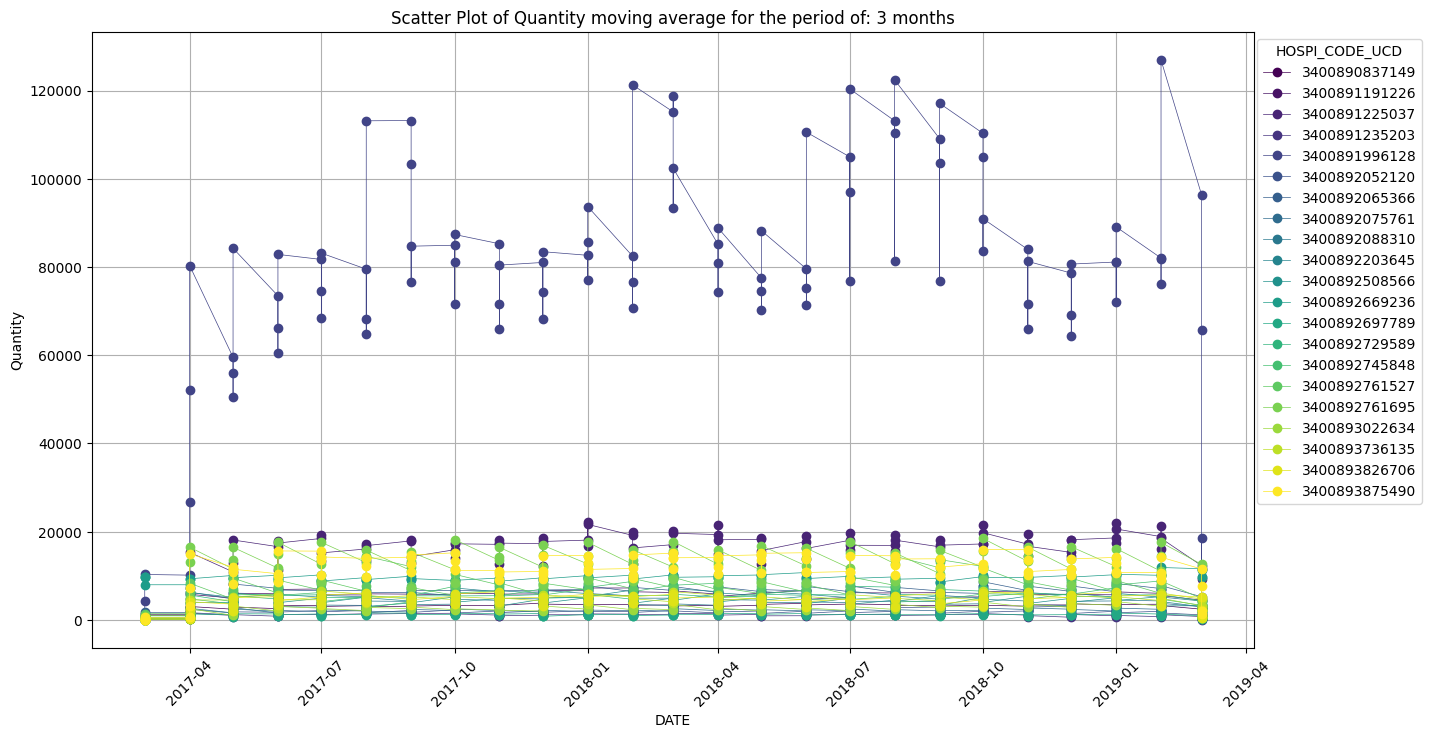

In [5]:
df_ma_3 = calculate_moving_average(df.copy(), 'QUANTITY', 3)
df_ma_3 = df_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_ma_3, 'QUANTITY_MA', 3)

## 3.2 - Correlation analysis

<Axes: >

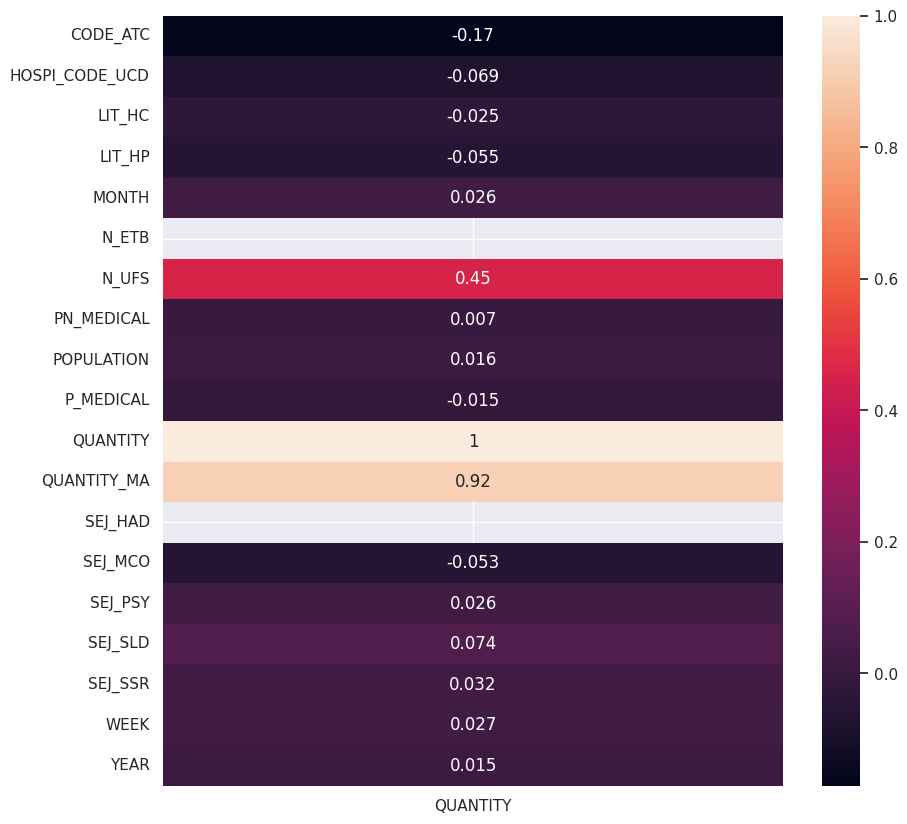

In [6]:
corr = df_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

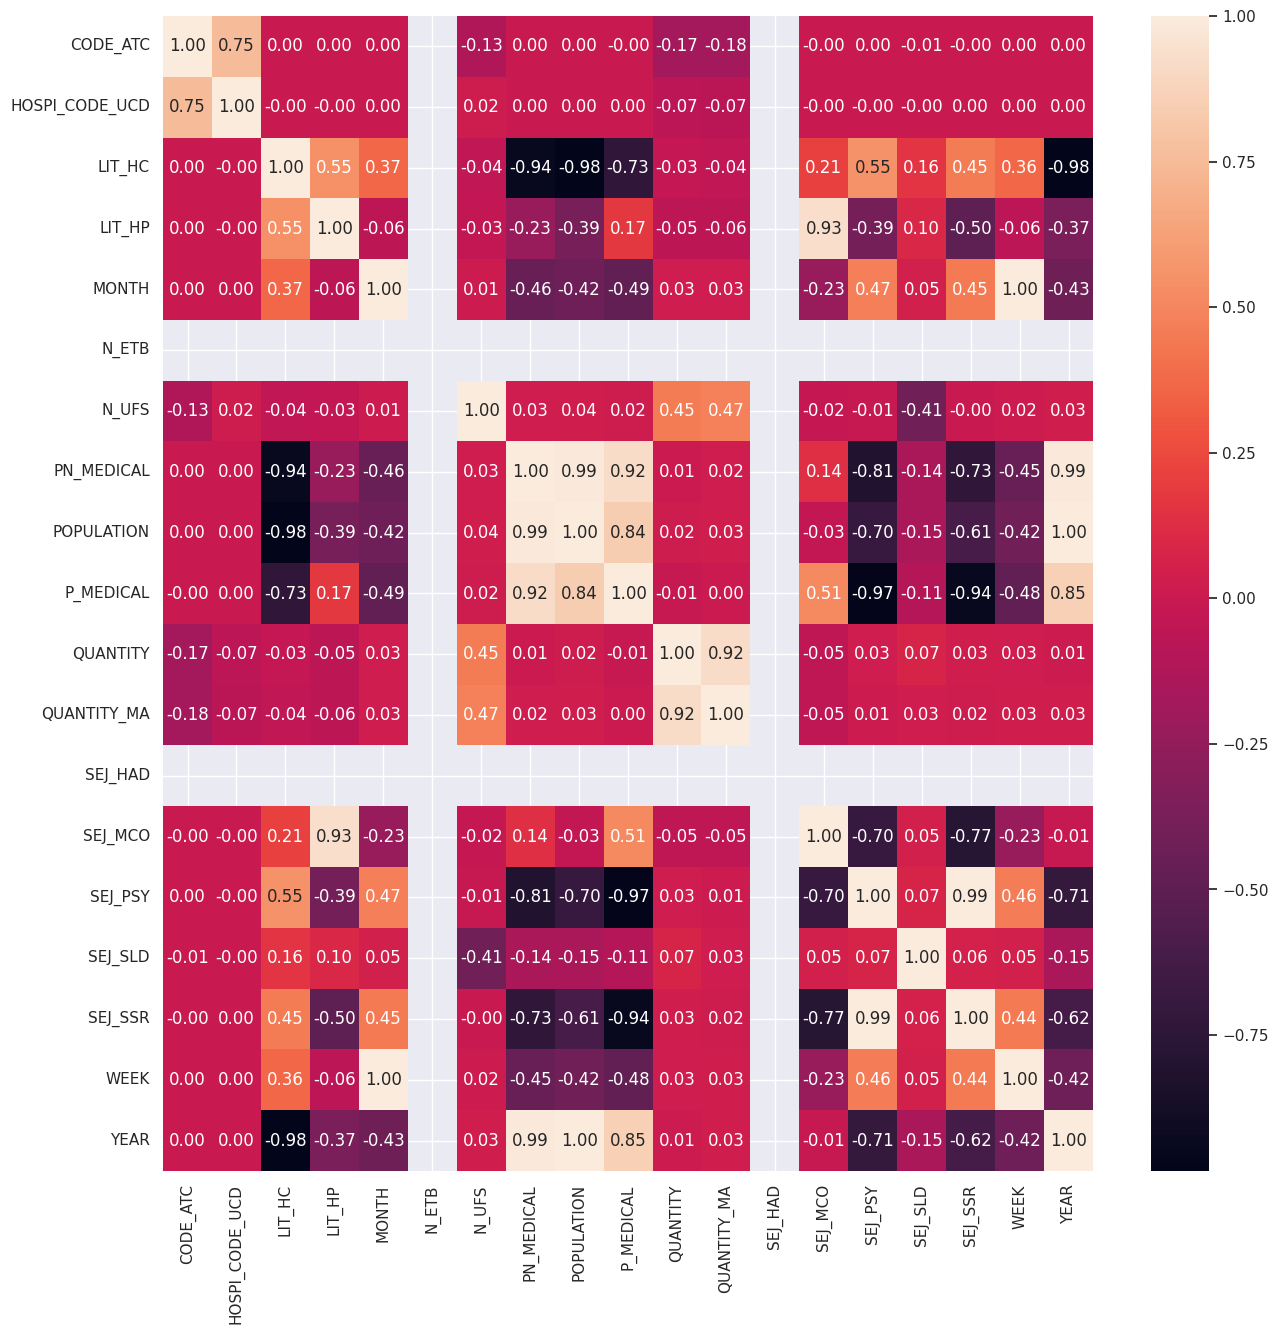

In [7]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


In [8]:
# Feature selection
df_modified = df_ma_3.drop(['N_ETB','SEJ_HAD'], axis=1).copy()


In [9]:
df_modified.to_csv('df_ma.csv', index=False)